In [2]:
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

Manim Community v0.18.0.post0

In [3]:
from scipy.spatial import distance
import numpy as np

# Distance Metrics Animation Playground

### Point Moving

In [14]:
%%manim -qm PointMoving


class PointMoving(Scene):
    def construct(self):

        # Coordinate system
        axes = Axes(
            axis_config={
                
                "font_size": 20, 
                "tick_size": 0.08,
                "tip_shape": StealthTip, 
                "tip_height": 0.12,
                },          
            ).add_coordinates()


        # Dot and dot path
        dot = Dot() 
        path_line = Line([0, 0, 0], [2, 1, 0])
        # path_circle = Circle(radius=1, color=BLUE)
        
        
        # Text

        label = Text("A wild dot appears!")

        
        # Contours

        def calculate_contour(x, y, level):
            x_dot, y_dot, z_dot = dot.get_center()
            return distance.minkowski([x, y], [x_dot, y_dot], 5) - level

        contour_1 = ImplicitFunction(lambda x, y: calculate_contour(x, y, 1))
        contour_2 = ImplicitFunction(lambda x, y: calculate_contour(x, y, 2))


        # Animation

        self.add(axes)
        self.wait()
        # self.play(Create(label))
        self.play(Create(dot))
        # self.add(contour_1, contour_2)
        # self.remove(contour_1, contour_2)
             
        self.play(MoveAlongPath(dot, path_line), run_time=2, rate_func=linear)
        self.add(contour_1, contour_2)
        # self.play(Create(contour_1, contour_2))
        # # self.play(Rotating(dot, about_point=[0, 0, 0]), run_time=3)
        # self.wait()



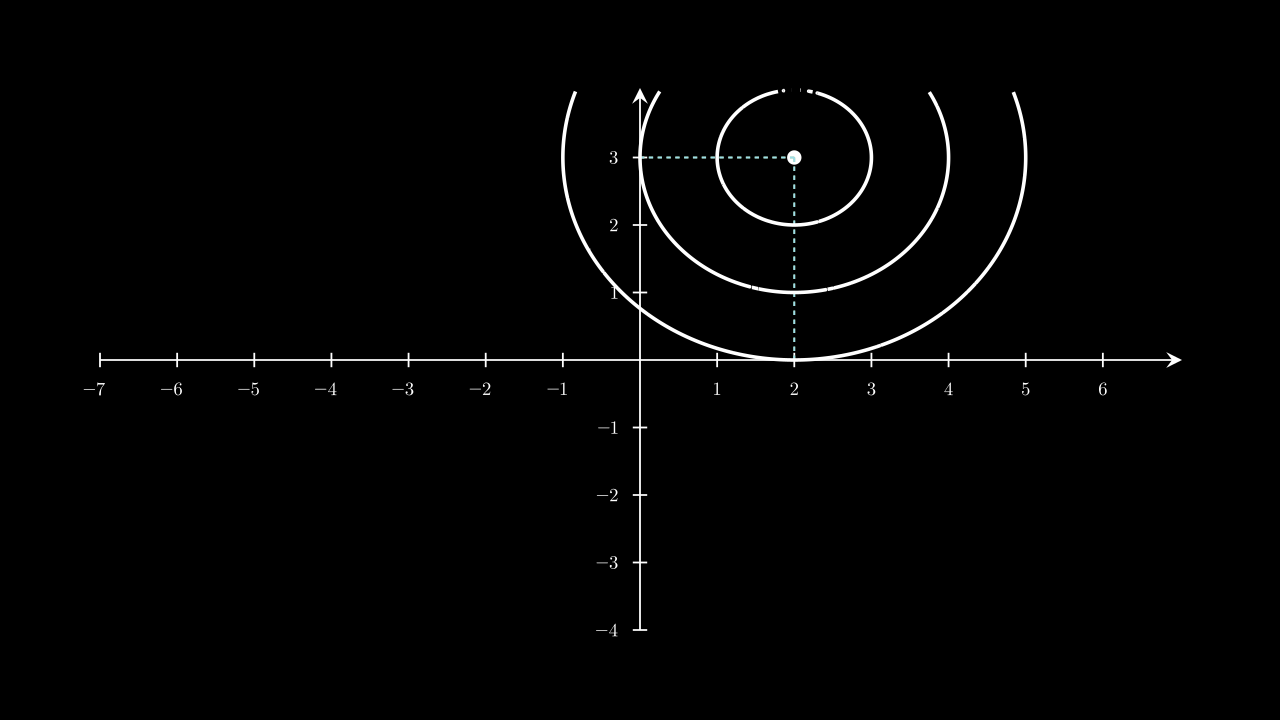

In [4]:
%%manim -qm PointMoving2


class PointMoving2(Scene):


    def construct(self):
        


        # Coordinate system
        axes = Axes(
            axis_config={
                
                "font_size": 20, 
                "tick_size": 0.08,
                "tip_shape": StealthTip, 
                "tip_height": 0.12,
                },          
            ).add_coordinates()
        
        self.add(axes)


        # Dot 
        dot = Dot(axes.c2p(2, 3)) 
        self.add(dot)

        # Dot Coordinates

        line_1 = axes.get_lines_to_point(dot.get_center(), color=GREEN_B)
        line_2 = axes.get_lines_to_point(dot.get_center(), color=BLUE_B)
        self.add(line_1, line_2)


        # Contours
        def distance_function(x, y, dot_center, level = 1):
            x_p, y_p = dot_center
            return distance.minkowski([x, y], [x_p, y_p]) - level
        for level in range(1, 4):
            contour = axes.plot_implicit_curve(lambda x, y: distance_function(x, y, axes.p2c(dot.get_center()), level = level))
            self.add(contour)





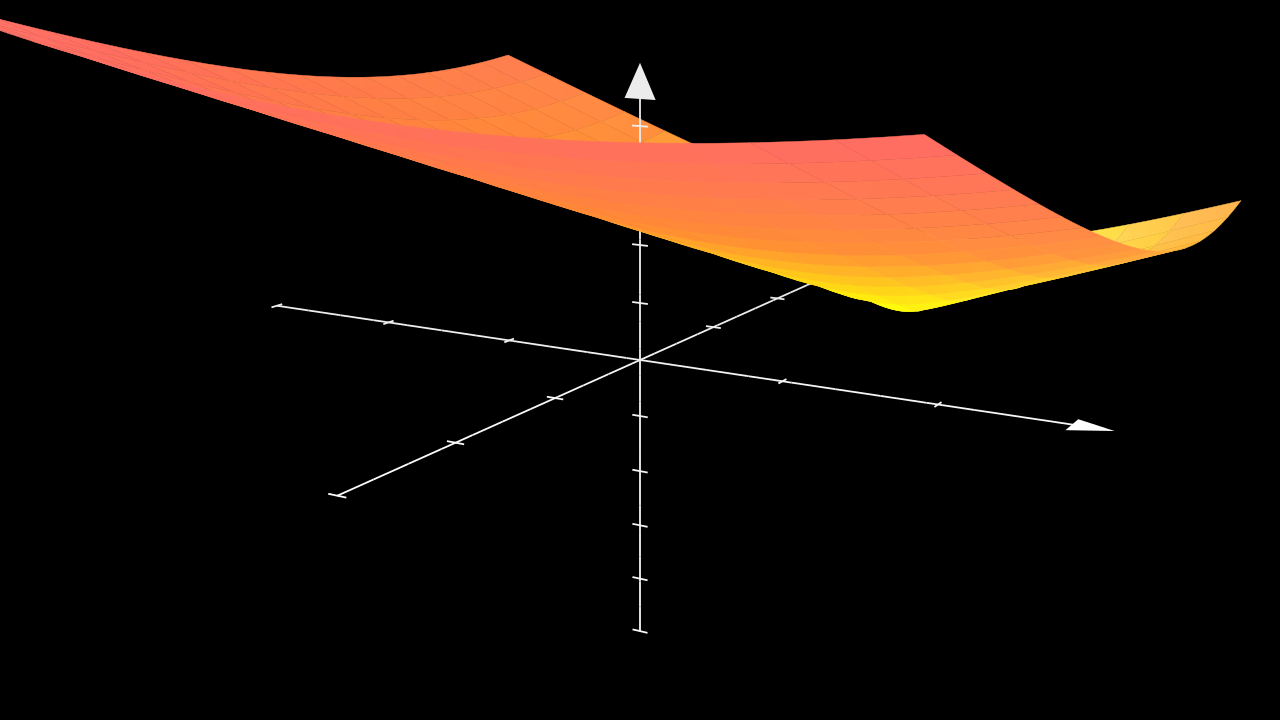

In [40]:
%%manim -qm PlotSurfaceExample

class PlotSurfaceExample(ThreeDScene):
    def construct(self):
        resolution_fa = 16
        self.set_camera_orientation(phi=75 * DEGREES, theta=-60 * DEGREES)
        axes = ThreeDAxes(x_range=(-3, 3, 1), y_range=(-3, 3, 1), z_range=(-5, 5, 1))
        def param_trig(u, v):
            x = u
            y = v
            # z = 2 * np.sin(x) + 2 * np.cos(y)
            z = distance.minkowski([x, y], [1, 2])
            return z
        trig_plane = axes.plot_surface(
            param_trig,
            resolution=(resolution_fa, resolution_fa),
            u_range = (-3, 3),
            v_range = (-3, 3),
            colorscale = [BLUE, GREEN, YELLOW, ORANGE, RED],
            )
        self.add(axes, trig_plane)

In [12]:
%%manim -qm TangentAnimation

class TangentAnimation(Scene):
    def construct(self):
        ax = Axes()
        sine = ax.plot(np.sin, color=RED)
        alpha = ValueTracker(0)
        point = always_redraw(
            lambda: Dot(
                sine.point_from_proportion(alpha.get_value()),
                color=BLUE
            )
        )


        def distance_function(x, y, dot_center, level = 1):
            x_p, y_p = dot_center
            return distance.minkowski([x, y], [x_p, y_p]) - level
        
        # contour = ax.plot_implicit_curve(lambda x, y: distance_function(x, y, ax.p2c(point.get_center()), level = 1))
        
        contour = always_redraw(lambda: ax.plot_implicit_curve(lambda x, y: distance_function(x, y, ax.p2c(point.get_center()), level = 1)))


        self.add(ax, sine, point, contour)
        self.wait()
        self.play(alpha.animate.set_value(1), rate_func=linear, run_time=2)
        
        self.remove(contour, point)
        self.wait()

### Moving contours

In [12]:
%%manim -qm ContourMove


class ContourMove(Scene):

    def construct(self):
        

        # Coordinate system
        ax = Axes(
            axis_config={
                
                "font_size": 20, 
                "tick_size": 0.08,
                "tip_shape": StealthTip, 
                "tip_height": 0.12,
                },          
            ).add_coordinates()

        # Value Tracker
        alpha = ValueTracker(0)    

        # Path
        sine = ax.plot(
            np.sin,
            # x_range = [-2, 2, 0.1], 
            x_range = [-2, 2, 1],
            color=RED,
        )
        
        # Point
        point = always_redraw(
            lambda: Dot(
                sine.point_from_proportion(alpha.get_value()),
                color=BLUE
            )
        )

        # Contours
        def distance_function(x, y, dot_center, level = 1):
            x_p, y_p = dot_center
            return distance.minkowski([x, y], [x_p, y_p], p = 4) - level
        
        
        
        contour = always_redraw(lambda: ax.plot_implicit_curve(
            lambda x, y: distance_function(x, y, ax.p2c(point.get_center()), level = 1),
                        min_depth = 3, 
                        max_quads = 1000,
                        color = YELLOW,
                        fill_color=GREEN,

        ))

        # Animation
        self.add(ax, sine, point, contour)
        self.wait()
        # self.play(alpha.animate.set_value(1), rate_func=linear, run_time=2)

### Contour fill

In [84]:
%%manim -qm ContourFill


class ContourFill(Scene):
   
        def construct(self):

            # Coordinate system
            ax = Axes(
                # x_length = 6,
                # y_length = 6,
                axis_config={
                    "unit_size": 2,
                    "font_size": 20, 
                    "tick_size": 0.08,
                    "tip_shape": StealthTip, 
                    "tip_height": 0.12,
                    },          
                ).add_coordinates()
            self.add(ax)
                
            # Point

            point = Dot(ax.c2p(0, 0))
            self.play(Create(point))
            self.wait()


            # Contours

            def distance_function(x, y, dot_center, level = 1, p = 1):
                
                x_p, y_p = dot_center
               
                return distance.minkowski([x, y], [x_p, y_p], p = p) - level
            
            

            contour_group = VGroup()
        
            for level in range(1, 4):

                contour = ax.plot_implicit_curve(
                            lambda x, y: distance_function(x, y, ax.p2c(point.get_center()), level = level, p = 1),
                            min_depth = 3, 
                            max_quads = 1000,
                            color = BLUE,
                            ).set_fill(BLUE_B, opacity=0.3)
    
            
                self.play(DrawBorderThenFill(contour))
                contour_group.add(contour)
            
            self.play(FadeOut(contour_group))


            

In [105]:
%%manim -qm ContourTransform


class ContourTransform(Scene):
   
        def construct(self):

            # Coordinate system
            ax = Axes(
                # x_length = 6,
                # y_length = 6,
                axis_config={
                    "unit_size": 2,
                    "font_size": 20, 
                    "tick_size": 0.08,
                    "tip_shape": StealthTip, 
                    "tip_height": 0.12,
                    },          
                ).add_coordinates()
            self.add(ax)
                
            # Point

            point = Dot(ax.c2p(0, 0))
            self.play(Create(point))
            self.wait()


            # Contours

            def minkowski_distance_function(x, y, dot_center, level = 1, p = 1):
                x_p, y_p = dot_center
                return distance.minkowski([x, y], [x_p, y_p], p = p) - level
            
            
            def contour_plot(distance_function, draw = False, **kwargs):
                # kwargs for distance function

                plot_group = VGroup()
            
                for level in range(1, 4):

                    contour = ax.plot_implicit_curve(
                                lambda x, y: distance_function(x, y, ax.p2c(point.get_center()), level = level, **kwargs),
                                min_depth = 3, 
                                max_quads = 1000,
                                color = BLUE,
                                ).set_fill(BLUE_B, opacity=0.3)
        
                    if draw: 
                        self.play(DrawBorderThenFill(contour))
                    
                    plot_group.add(contour)
                
                return plot_group


            manhatten = contour_plot(minkowski_distance_function, draw = True)
            euclidean = contour_plot(minkowski_distance_function, p = 2)
            minkowski_3 = contour_plot(minkowski_distance_function, p = 3)
            minkowski_5 = contour_plot(minkowski_distance_function, p = 5)
            chebishev = contour_plot(minkowski_distance_function, p = np.inf)


            self.play(ReplacementTransform(manhatten, euclidean))
            self.wait(2)
            self.play(ReplacementTransform(euclidean, minkowski_3))
            self.wait(2)
            self.play(ReplacementTransform(minkowski_3, minkowski_5))
            self.wait(2)
            self.play(ReplacementTransform(minkowski_5, chebishev))
            self.wait(3)
            


            

In [115]:
%%manim -qm ContourTransform


class ContourTransform(Scene):
   
        def construct(self):

            # Coordinate system
            ax = Axes(
                # x_length = 6,
                # y_length = 6,
                axis_config={
                    "unit_size": 2,
                    "font_size": 20, 
                    "tick_size": 0.08,
                    "tip_shape": StealthTip, 
                    "tip_height": 0.12,
                    },          
                ).add_coordinates()
            self.add(ax)
                
            # Point
            point = Dot(ax.c2p(3, 2))
            self.play(Create(point))
            self.wait()


            # Contours
            
            def contour_plot(distance_function = distance.minkowski, contour_levels = range(1, 4), draw = False, **kwargs):
                # kwargs for distance function

                def single_contour_function(x, y, dot_center, distance_function = distance_function, level = 1, p = None):
                    x_p, y_p = dot_center
                    kwargs = {}
                    if p:
                        kwargs = {"p": p}
                    return distance_function([x, y], [x_p, y_p], **kwargs) - level

                plot_group = VGroup()
            
                for level in contour_levels:

                    contour = ax.plot_implicit_curve(
                                lambda x, y: single_contour_function(x, y, ax.p2c(point.get_center()), level = level, **kwargs),
                                min_depth = 3, 
                                max_quads = 1000,
                                color = BLUE,
                                ).set_fill(BLUE_B, opacity=0.3)
        
                    if draw: 
                        self.play(DrawBorderThenFill(contour))
                    
                    plot_group.add(contour)
                
                return plot_group


            # manhatten = contour_plot(draw = True)
            # euclidean = contour_plot(p = 2)
            cosine = contour_plot(distance_function = distance.cosine, contour_levels = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2], draw = True)
            # minkowski_3 = contour_plot(minkowski_distance_function, p = 3)
            # minkowski_5 = contour_plot(minkowski_distance_function, p = 5)
            # chebishev = contour_plot(minkowski_distance_function, p = np.inf)


            # self.play(ReplacementTransform(manhatten, euclidean))
            # self.wait(2)
            # self.play(ReplacementTransform(euclidean, minkowski_3))
            # self.wait(2)
            # self.play(ReplacementTransform(minkowski_3, minkowski_5))
            # self.wait(2)
            # self.play(ReplacementTransform(minkowski_5, chebishev))
            # self.wait(3)
            


            

c:\Users\diana\anaconda3\envs\manimenv\Lib\site-packages\scipy\spatial\distance.py:647: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


In [111]:
distance.cosine([1, 1], [-2, -2])

2.0

In [6]:
# %%manim -qm MergedScene

# class Scene_1 (Scene):
#         def construct (self):
#               self.play(Write(Text("this is scene one")))

# class Scene_2 (Scene):
#         def construct (self):
#               self.play(Write(Text("this is scene two")))

# class MergedScene (Scene):
#         def construct (self):
#               Scene_1.construct()
#               Scene_2.construct()

In [14]:
%%manim -qm TextWrap

class TextWrap(Scene):
    def construct(self):
        text=Tex(""" metric or distance function is a function 
$d(x,y)$ 
that defines the distance between 

new line element

another new line with long long loooooooong long long text""")
        text.scale(0.6)
        self.play(FadeIn(text))
        self.wait(3)
        self.play(FadeOut(text))

### Text Wrapping

In [5]:
text_str = """Instead of A and B, lets add some context and call them Home and School. The distance between Home and School is 2 kilometers. Instead of A and B, lets add some context and call them Home and School. The distance between Home and School is 2 kilometers. That's the length of the straight line between them."""

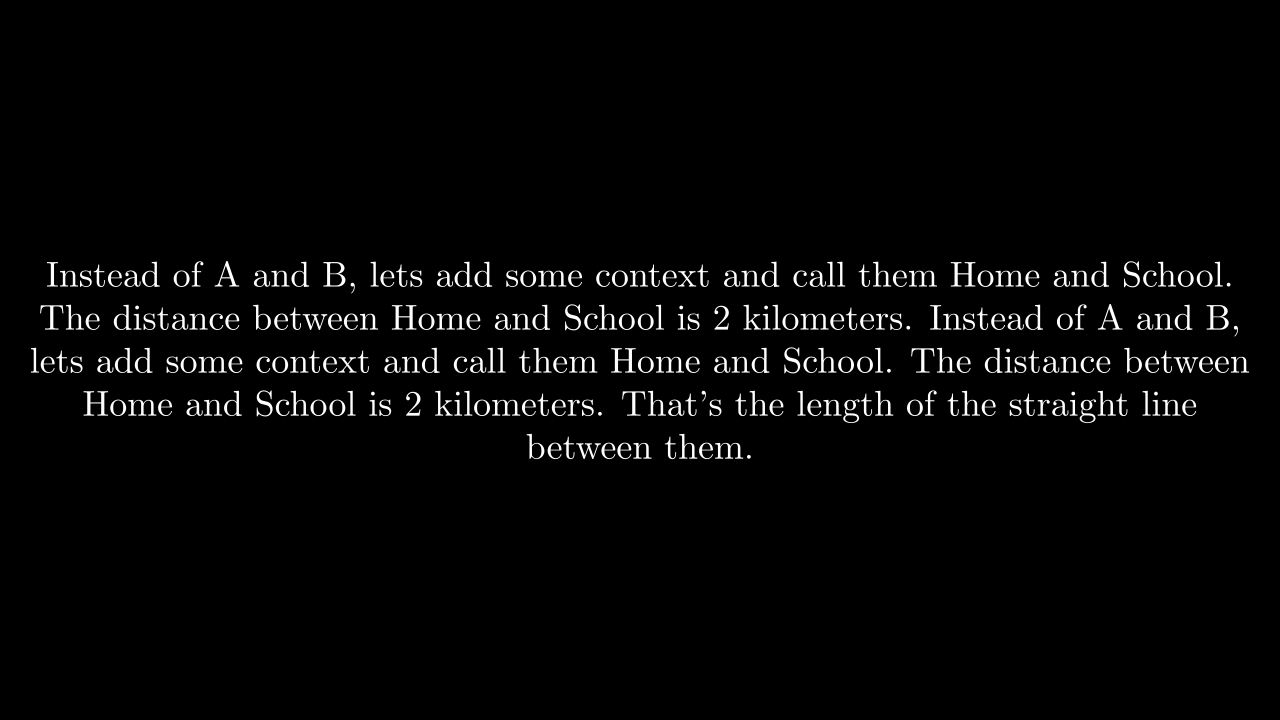

In [22]:
%%manim -qm TextWrap


class TextWrap(Scene):
    def construct(self):
        text = Tex(text_str).scale(0.8)
        self.add(text)
        # self.play(Write(text))


In [67]:
%%manim -qm IntroPlayground


class IntroPlayground(Scene):

    def construct(self):
        # Title
        title = Text("What is distance?")\
            .scale(1.1)\
            .to_edge(UL)
        self.add(title)
    
        # Points A and B
        point_home = Dot(point = [-1, -1, 0])
        label_a = Text("A")\
            .next_to(point_home, LEFT)
        point_school = Dot(point = [3, 2, 0])
        label_b = Text("B")\
            .next_to(point_school)
        
        text = Tex(text_str)\
                .scale(0.8)\
                .shift(DOWN * 3)
        self.add(point_home, point_school) 
        # self.add(label_a, label_b)     


        # Straight line A to B
        line = Line(start=point_home, end=point_school)
        self.add(line)
        
        # Home and School
        home = ImageMobject("icons/house.jpg")
        home.height = 0.6
        home.next_to(point_home, LEFT)
        home_label = Text("Home")\
            .scale(0.6)\
            .next_to(home, DOWN)
        school = ImageMobject("icons/school.jpg")
        school.height = 0.6
        school.next_to(point_school)
        school_label = Text("School")\
            .scale(0.6)\
            .next_to(school, UP)
        # self.remove(label_a, label_b)  
        self.add(home, school)
        self.add(home_label,school_label)


        # Brace Home to School

        # brace = BraceBetweenPoints(point_school.get_center(), point_home.get_center())
        # brace_label = Text("2 km")\
        #     .scale(0.6)\
        #     .next_to(line.get_center())\
        #     .rotate(3/4)\
        #     .shift(LEFT, UP)       
        # self.add(brace, brace_label)

        def perpendicular_direction(point_a, point_b):
            ax, ay, az = point_a.get_center()
            bx, by, az = point_b.get_center()

            return [-(ay - by) / (ax - bx), 1, 0]

        brace = BraceLabel(line, "2 km", brace_direction=perpendicular_direction(point_home, point_school))

        self.add(brace)




        self.wait(3)
        
